# Tests of Plotting Tools

Author: Bill Tubbs

In [19]:
import control
control.__version__

'dev'

In [20]:
from control import (tf, c2d, rlocus, bode_plot, nyquist_plot, nichols, pole_zero_plot, 
                     evalfr, dcgain, step_response, frequency_response,
                     frequency_response_bode, frequency_response_nyquist, 
                     gangof4_plot, pole, zero, sisotool)
from control.statesp import StateSpace
from control.grid import sgrid, zgrid, nogrid
import numpy as np
import matplotlib.pyplot as plt
import os

In [21]:
plot_dir = 'temp_plots'
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

# Helper function for saving figures
def savefig(label, fname='{}_fig{}.pdf'):
    fig_n = plt.gcf().number
    plt.savefig(os.path.join(plot_dir, fname.format(label, fig_n)))


## Example systems

In [22]:
# Continuous-time transfer functions
G1 = tf([2, 2], np.convolve([1, 1], [1, 1]))
G2 = tf(130, [1, 8, 30, 56, 65])
G3 = tf(1, np.convolve([-0.5j, 1], [0.5j, 1]));  # pure imag.

# Continuous-time state-space systems
A = np.array([[1, 1], [0, 1]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])
D = 0
Gssc = StateSpace(A, B, C, D)

# Discrete-time systems
Ts = 0.5
G1d = c2d(G1, Ts)
G2d = c2d(G2, Ts)
Gssd = c2d(Gssc, Ts)

## Step responses

/Users/billtubbs/python-control/control/xferfcn.py:1058: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


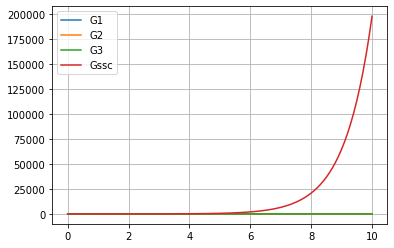

In [23]:
t = np.linspace(0, 10, 101)
fig, ax = plt.subplots()
for label, sys in {'G1': G1, 'G2': G2, 'G3': G3, 'Gssc': Gssc}.items():
    response = step_response(sys, t)
    ax.plot(t, response.y[0, 0, :], label=label)
plt.grid()
plt.legend()
plt.show()

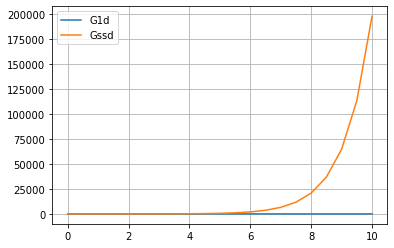

In [24]:
t = Ts*np.arange(0, 21)
fig, ax = plt.subplots()
for label, sys in {'G1d': G1d, 'Gssd': Gssd}.items():
    response = step_response(sys, t)
    ax.plot(t, response.y[0, 0, :], label=label)
plt.grid()
plt.legend()
plt.show()

## Test static gain

In [25]:
sys = G1
assert(dcgain(sys) == 2)
assert(sys(0) == 2)

## Test Frequency Response

In [26]:
sys = G1
w = np.logspace(-1, 1, 3)
mag, phase, wout = frequency_response(sys, w)
assert(np.array_equal(wout, w))
assert(np.array_equal(mag.round(6), [1.990074, 1.414214, 0.199007]))
assert(np.array_equal(np.degrees(phase).round(4), [-5.7106, -45., -84.2894]))

In [27]:
mag, phase, wout = frequency_response_bode(sys)  # same defaults as bode_plot

np.vstack([mag, phase, wout]).T[:10]

array([[ 1.99007438, -0.09966865,  0.1       ],
       [ 1.98998314, -0.1001261 ,  0.10046204],
       [ 1.98989106, -0.10058562,  0.10092622],
       [ 1.98979815, -0.10104721,  0.10139254],
       [ 1.98970438, -0.1015109 ,  0.10186102],
       [ 1.98960976, -0.10197669,  0.10233166],
       [ 1.98951428, -0.10244458,  0.10280447],
       [ 1.98941793, -0.10291459,  0.10327947],
       [ 1.9893207 , -0.10338673,  0.10375667],
       [ 1.98922259, -0.103861  ,  0.10423607]])

## Test Nyquist Plot Criteria

In [28]:
sys = G1
assert(sys(0+0j) == 2+0j)
assert(np.isclose(sys(3j), 0.2-0.6j))
assert(np.isclose(evalfr(sys, 3j), 0.2-0.6j))

In [29]:
fr = sys(w*1j)
assert(np.array_equal(fr.round(6), [1.980198-0.198020j, 
                                    1-1j, 0.019802-0.198020j]))

In [30]:
count, contour = frequency_response_nyquist(G2)  # same defaults as nyquist_plot
count, contour.shape

(2, (1000,))

## Test Bode Plot

In [31]:
sys = G1d

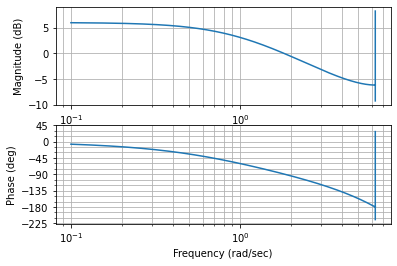

In [32]:
# Quick plot
bode_plot(sys)
plt.show()

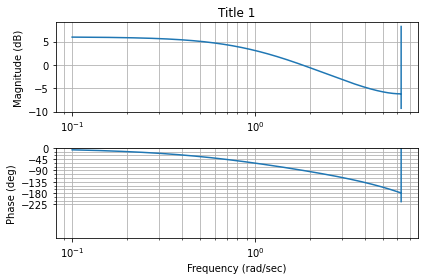

In [33]:
# Plot with axes adjustments
fig, axes = bode_plot(sys)  # TODO: Add kwarg figsize.
axes[0].set_title('Title 1')
axes[1].set_ylim([-360, 0])
plt.tight_layout()
plt.show()

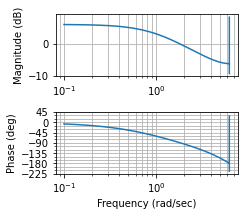

In [34]:
# Use an existing figure
plt.figure(figsize=(3.5, 3))
bode_plot(sys)
plt.tight_layout()
plt.show()

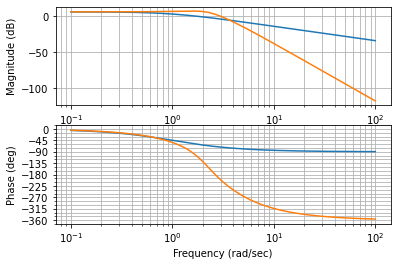

In [35]:
# Bode plot with multiple systems
bode_plot([G1, G2])
plt.show()

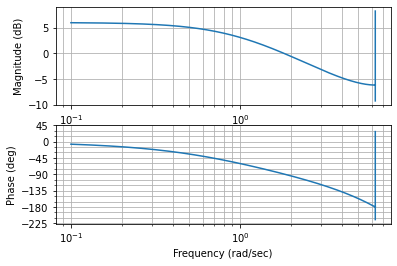

In [36]:
# Test MATLAB wrapper function
from control.matlab import bode

bode(sys)
plt.show()

(array([1.99027913, 1.99014479, 1.99000861, 1.98987056, 1.98973062,
        1.98958876, 1.98944496, 1.98929918, 1.98915141, 1.98900162,
        1.98884978, 1.98869586, 1.98853983, 1.98838167, 1.98822135,
        1.98805884, 1.9878941 , 1.98772711, 1.98755785, 1.98738627,
        1.98721234, 1.98703605, 1.98685734, 1.9866762 , 1.98649259,
        1.98630648, 1.98611783, 1.98592661, 1.98573278, 1.98553632,
        1.98533718, 1.98513533, 1.98493073, 1.98472335, 1.98451315,
        1.98430009, 1.98408414, 1.98386526, 1.9836434 , 1.98341854,
        1.98319062, 1.98295961, 1.98272547, 1.98248815, 1.98224762,
        1.98200384, 1.98175675, 1.98150632, 1.9812525 , 1.98099524,
        1.98073452, 1.98047026, 1.98020244, 1.97993101, 1.97965591,
        1.9793771 , 1.97909453, 1.97880816, 1.97851793, 1.97822379,
        1.97792569, 1.97762358, 1.97731741, 1.97700713, 1.97669268,
        1.97637401, 1.97605106, 1.97572378, 1.97539211, 1.975056  ,
        1.9747154 , 1.97437023, 1.97402045, 1.97

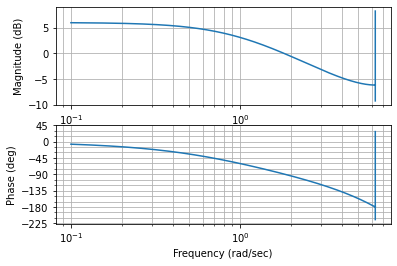

In [37]:
bode(sys)

In [38]:
mag, phase, omega = bode(sys, plot=False)

np.vstack([mag, phase, omega]).T[:10]

array([[ 1.99027913, -0.12674344,  0.1       ],
       [ 1.99014479, -0.12761825,  0.10069386],
       [ 1.99000861, -0.12849903,  0.10139254],
       [ 1.98987056, -0.12938583,  0.10209607],
       [ 1.98973062, -0.13027868,  0.10280447],
       [ 1.98958876, -0.13117762,  0.1035178 ],
       [ 1.98944496, -0.1320827 ,  0.10423607],
       [ 1.98929918, -0.13299395,  0.10495932],
       [ 1.98915141, -0.13391141,  0.1056876 ],
       [ 1.98900162, -0.13483513,  0.10642092]])

# Test Nyquist Plot

In [39]:
sys = G1

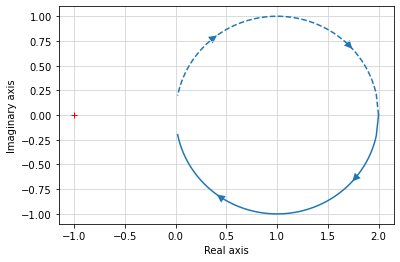

In [40]:
# Quick plot
nyquist_plot(sys)
plt.show()

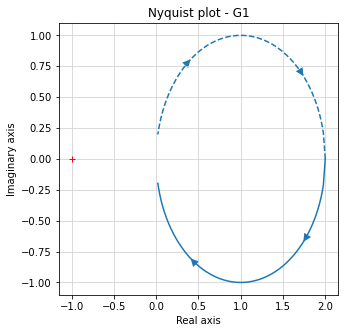

In [41]:
# Plot with axes adjustments
plt.figure(figsize=(5, 5))
ax = nyquist_plot(sys)
ax.set_title('Nyquist plot - G1')
plt.show()

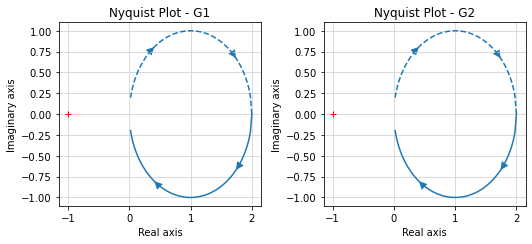

In [42]:
# Add subplots to existing figure
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3.5))

ax = axes[0]
nyquist_plot(G1, ax=ax)
ax.set_title('Nyquist Plot - G1')

ax = axes[1]
nyquist_plot(G1, ax=ax)
ax.set_title('Nyquist Plot - G2')

plt.tight_layout()
plt.show()

In [43]:
from control.freqplot import _nyquist_contours_and_encirclements



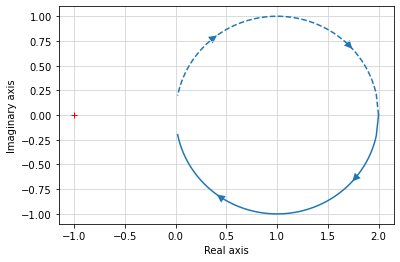

In [44]:
# Test MATLAB wrapper function
from control.matlab import nyquist

nyquist(sys)
plt.show()

In [45]:
re, im, omega = nyquist(sys, plot=False)
np.vstack([re, im, omega]).T[:10]

array([[ 2.        ,  0.        ,  0.        ],
       [ 1.98001644, -0.1989165 ,  0.10046204],
       [ 1.97983322, -0.19981708,  0.10092622],
       [ 1.97964833, -0.20072157,  0.10139254],
       [ 1.97946176, -0.20162999,  0.10186102],
       [ 1.97927351, -0.20254234,  0.10233166],
       [ 1.97908354, -0.20345864,  0.10280447],
       [ 1.97889185, -0.20437891,  0.10327947],
       [ 1.97869843, -0.20530316,  0.10375667],
       [ 1.97850325, -0.2062314 ,  0.10423607]])

## Test Gang of Four Plot

In [46]:
help(gangof4_plot)

Help on function gangof4_plot in module control.freqplot:

gangof4_plot(P, C, omega=None, axes=None, **kwargs)
    Plot the 'Gang of 4' transfer functions for a system
    
    Given a transfer function describing the plant P and a transfer function
    describing the controller C, generates a figure with 2x2 plots showing
    the frequency responses of the four transfer functions:
    
    S = 1/(1+PC) : Sensitivity function
    PS = P/(1+PC) : Load disturbance to measurement signal
    CS = C/(1+PC) : Measurement noise to control signal
    T = PC/(1+PC) : Complementary sensitivity function
    
    Parameters
    ----------
    P, C : LTI
        Linear input/output systems (process and control)
    omega : array
        Range of frequencies (list or bounds) in rad/sec
    **kwargs : :func:`matplotlib.pyplot.plot` keyword properties, optional
        Additional keywords (passed to `matplotlib`)
    
    Returns
    -------
    None



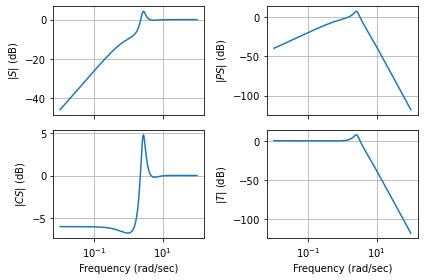

In [47]:
# Quick plot
P = G2
C = tf([0.5, 0.5], [0.5, 0])
gangof4_plot(P, C)
plt.show()

In [48]:
G1

TransferFunction(array([2, 2]), array([1, 2, 1]))

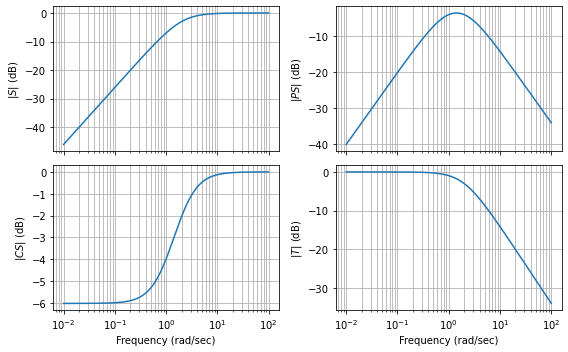

In [49]:
# Using existing figure
plt.figure(figsize=(8, 5))
P = sys
C = tf([0.5, 0.5], [0.5, 0])
gangof4_plot(P, C)
plt.show()

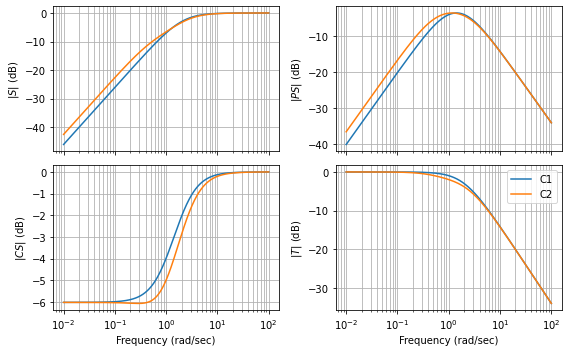

In [50]:
# Two systems on one plot

P = sys
C1 = tf([0.5, 0.5], [0.5, 0])
C2 = tf([0.75, 0.5], [0.75, 0])

plt.figure(figsize=(8, 5))
gangof4_plot(P, C1, label='C1')
gangof4_plot(P, C2, label='C2')

plt.legend()
plt.show()

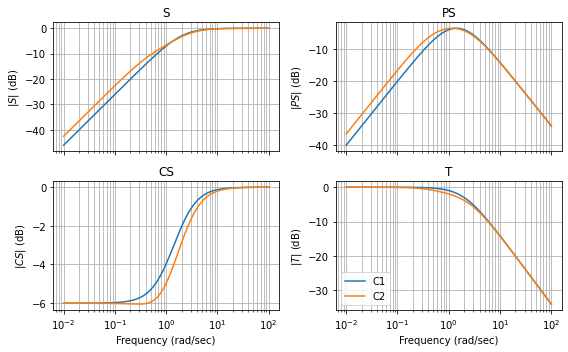

In [51]:
# More control of plotting using axes handles
P = sys
C1 = tf([0.5, 0.5], [0.5, 0])
C2 = tf([0.75, 0.5], [0.75, 0])

plt.figure(figsize=(8, 5))
fig, axes = gangof4_plot(P, C1, label='C1')
fig, axes = gangof4_plot(P, C2, label='C2')

axes[0].set_title('S')
axes[1].set_title('PS')
axes[2].set_title('CS')
axes[3].set_title('T')
axes[3].legend(loc='lower left')

fig.tight_layout()
plt.savefig('gangof4plot1.png', dpi=150)
plt.show()

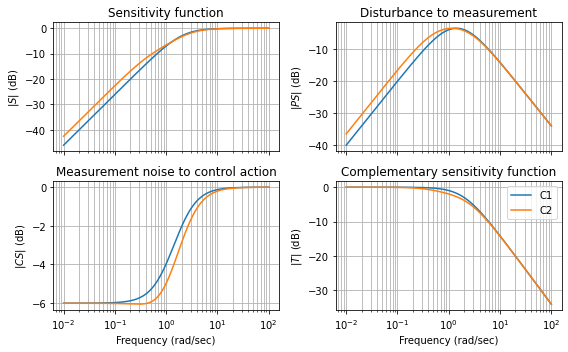

In [52]:
# Full control of plotting
P = sys

controllers = {
    'C1': tf([0.5, 0.5], [0.5, 0]),
    'C2': tf([0.75, 0.5], [0.75, 0])
}

titles = {
    (0, 0): 'Sensitivity function', 
    (0, 1): 'Disturbance to measurement',
    (1, 0): 'Measurement noise to control action',
    (1, 1): 'Complementary sensitivity function'
}

fig, axes = plt.subplots(2, 2, figsize=(8, 5))

for i, (label, C) in enumerate(controllers.items()):
    gangof4_plot(P, C, axes=axes, label=label)
    for pos, title in titles.items():
        axes[pos].set_title(title)
    axes[1, 1].legend()

plt.tight_layout()
plt.savefig('gangof4plot2.png', dpi=150)
plt.show()

In [53]:
ylabels = [ax.get_ylabel() for ax in axes.flat]
ylabels

['$|S|$ (dB)', '$|PS|$ (dB)', '$|CS|$ (dB)', '$|T|$ (dB)']

## Test z-plane and s-plane grid functions

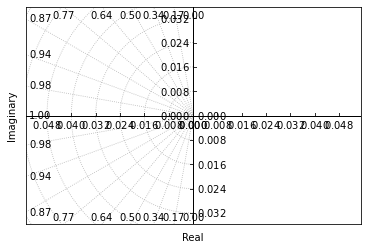

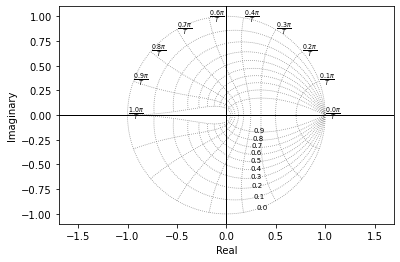

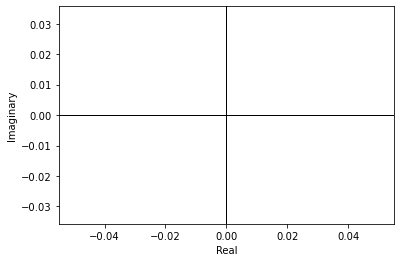

In [54]:
# First test zgrid and sgrid on their own
sgrid()
plt.show()

zgrid()
plt.show()

nogrid()
plt.show()

<AxesHostAxesSubplot:xlabel='Real', ylabel='Imaginary'>

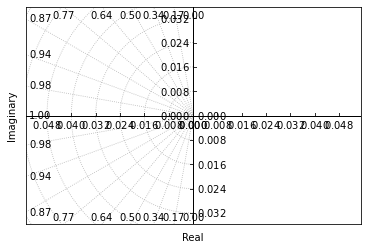

In [55]:
ax = sgrid()
ax

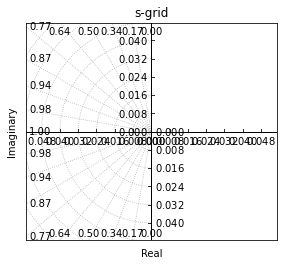

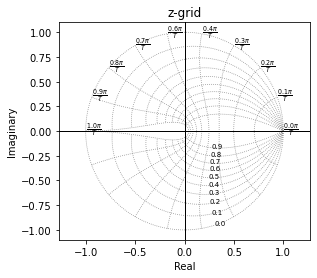

In [56]:
# Detect and use existing figure
plt.figure(figsize=(4.5, 4))
sgrid()
plt.title('s-grid')
savefig('sgrid1')

plt.figure(figsize=(4.5, 4))
zgrid()
plt.title('z-grid')
savefig('zgrid1')

plt.show()

Text(0.5, 1.0, 's-plane')

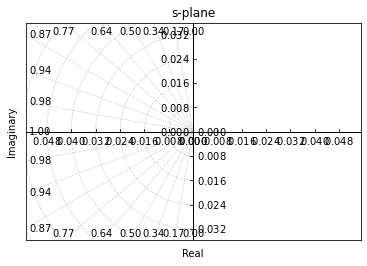

In [57]:
ax = sgrid()
ax.set_title('s-plane')

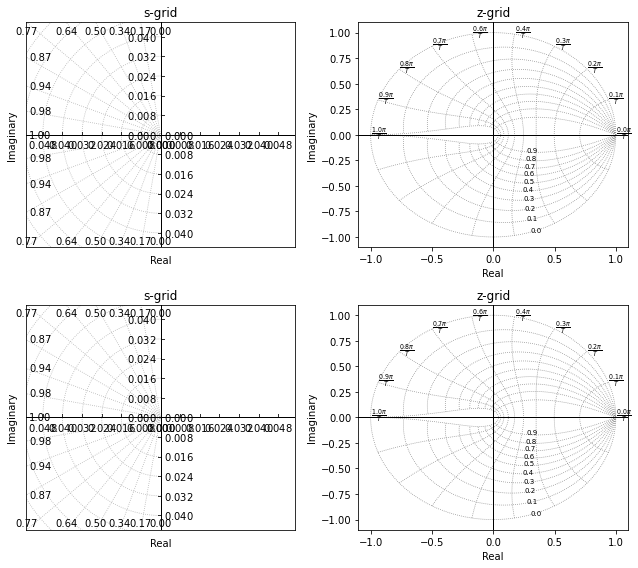

In [58]:
# Adding grids to existing axes
fig, axes = plt.subplots(2, 2, figsize=(9, 8))

ax = axes[0, 0]
ax = sgrid(ax=ax)  # sgrid creates a new ax
ax.set_title('s-grid')

ax = axes[0, 1]
ax = zgrid(ax=ax)
ax.set_title('z-grid')

ax = axes[1, 0]
ax = sgrid(ax=ax)  # sgrid creates a new ax
ax.set_title('s-grid')

ax = axes[1, 1]
ax = zgrid(ax=ax)
ax.set_title('z-grid')

plt.tight_layout()
plt.show()

## Test pole_zero_plot function

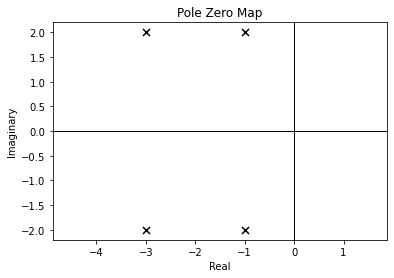

In [59]:
sys = G2
pole_zero_plot(sys)
plt.show()

In [60]:
ps, zs = pole(sys), zero(sys)
ps, zs

(array([-3.+2.j, -3.-2.j, -1.+2.j, -1.-2.j]), array([], dtype=float64))

Text(0.5, 1.0, 'Pole-Zero Map for G2')

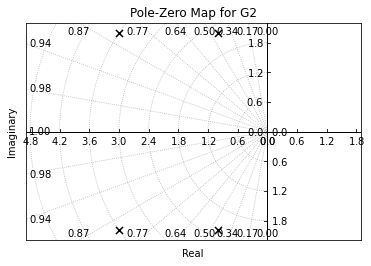

In [61]:
sys = G2
ax = pole_zero_plot(sys, grid=True)
ax.set_title('Pole-Zero Map for G2')

<AxesSubplot:title={'center':'Pole Zero Map'}, xlabel='Real', ylabel='Imaginary'>

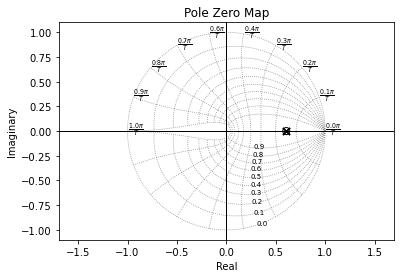

In [62]:
pole_zero_plot(G1d, grid=True)

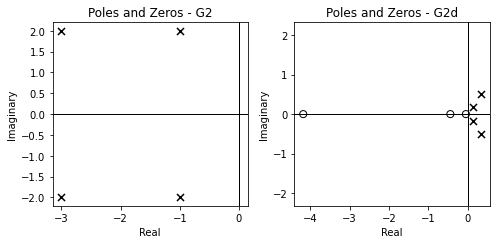

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))

ax = axes[0]
ax = pole_zero_plot(G2, ax=ax)
ax.set_title('Poles and Zeros - G2')

ax = axes[1]
ax = pole_zero_plot(G2d, ax=ax)
ax.set_title('Poles and Zeros - G2d')

plt.tight_layout()
plt.show()

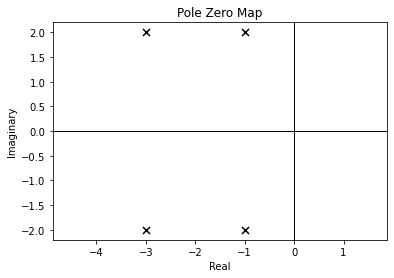

In [64]:
# Test MATLAB wrapper function
from control.matlab import pzmap

ps, zs = pzmap(G2)
plt.show()

In [65]:
ps, zs = pzmap(G2, plot=False)
ps, zs

(array([-3.+2.j, -3.-2.j, -1.+2.j, -1.-2.j]), array([], dtype=float64))

## Test SISO Tool

In [66]:
help(sisotool)

Help on function sisotool in module control.sisotool:

sisotool(sys, kvect=None, xlim_rlocus=None, ylim_rlocus=None, plotstr_rlocus='C0', rlocus_grid=False, omega=None, dB=None, Hz=None, deg=None, omega_limits=None, omega_num=None, margins_bode=True, tvect=None)
    Sisotool style collection of plots inspired by MATLAB's sisotool.
    The left two plots contain the bode magnitude and phase diagrams.
    The top right plot is a clickable root locus plot, clicking on the
    root locus will change the gain of the system. The bottom left plot
    shows a closed loop time response.
    
    Parameters
    ----------
    sys : LTI object
        Linear input/output systems. If sys is SISO, use the same
        system for the root locus and step response. If it is desired to
        see a different step response than feedback(K*loop,1), sys can be
        provided as a two-input, two-output system (e.g. by using
        :func:`bdgalg.connect' or :func:`iosys.interconnect`). Sisotool
        

## Test `rlocus` function

In [67]:
# Define test systems
s = tf('s')
G1 = 2*(s+1)/(s*(s-2))
G2 = tf(1, [1, 8, 30, 56, 65])
Gz1 = c2d(G1, 0.2)
Gz2 = c2d(G2, 0.2)

(array([[ 0.00000000e+00+0.00000000e+00j,  2.00000000e+00+0.00000000e+00j],
        [ 1.50587620e-02+0.00000000e+00j,  1.95549392e+00+0.00000000e+00j],
        [ 3.08304498e-02+0.00000000e+00j,  1.91027492e+00+0.00000000e+00j],
        [ 4.73868570e-02+0.00000000e+00j,  1.86427119e+00+0.00000000e+00j],
        [ 6.48120133e-02+0.00000000e+00j,  1.81739872e+00+0.00000000e+00j],
        [ 8.32052843e-02+0.00000000e+00j,  1.76955813e+00+0.00000000e+00j],
        [ 1.02685557e-01+0.00000000e+00j,  1.72063054e+00+0.00000000e+00j],
        [ 1.23397010e-01+0.00000000e+00j,  1.67047177e+00+0.00000000e+00j],
        [ 1.45517285e-01+0.00000000e+00j,  1.61890418e+00+0.00000000e+00j],
        [ 1.69269367e-01+0.00000000e+00j,  1.56570478e+00+0.00000000e+00j],
        [ 1.94939528e-01+0.00000000e+00j,  1.51058730e+00+0.00000000e+00j],
        [ 2.22905511e-01+0.00000000e+00j,  1.45317400e+00+0.00000000e+00j],
        [ 2.53683246e-01+0.00000000e+00j,  1.39294894e+00+0.00000000e+00j],
        [ 2.

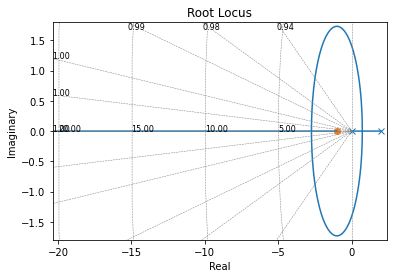

In [68]:
rlocus(G1)

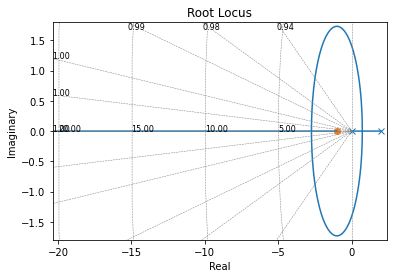

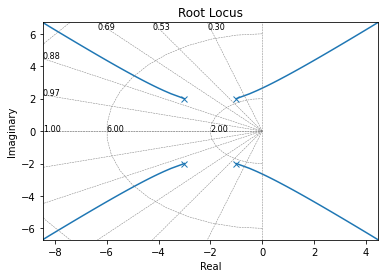

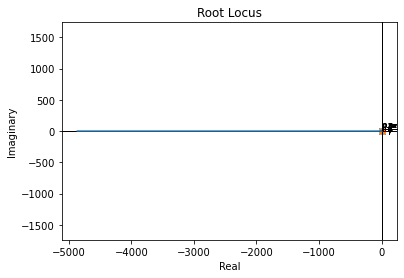

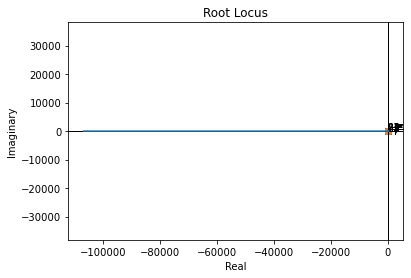

In [69]:
# Single plots
plt.figure()
rlocus(G1, title='Root Locus - G1')
plt.savefig('rlocus1.pdf')

plt.figure()
rlocus(G2, title='Root Locus - G2')
plt.savefig('rlocus2.pdf')

plt.figure()
rlocus(Gz1, title='Root Locus - Gz1')
plt.savefig('rlocus3.pdf')

plt.figure()
rlocus(Gz2, title='Root Locus - Gz2')
plt.savefig('rlocus4.pdf')

plt.show()

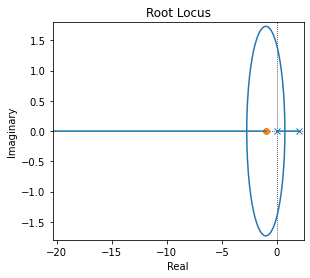

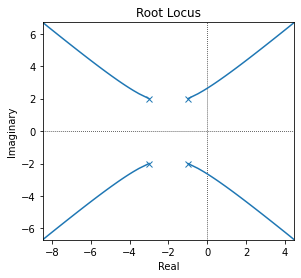

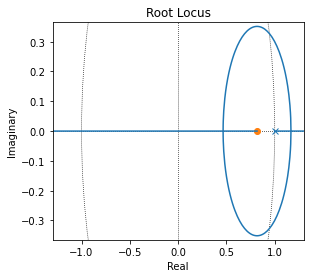

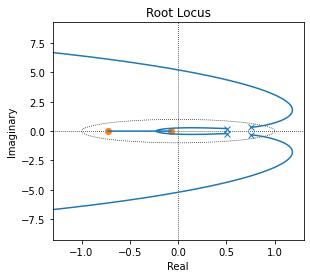

In [70]:
# Single default plots - without grid
plt.figure(figsize=(4.5, 4))
rlocus(G1, grid=False, title='Root Locus - G1')
plt.savefig('rlocus1.pdf')

plt.figure(figsize=(4.5, 4))
rlocus(G2, grid=False, title='Root Locus - G2')
plt.savefig('rlocus2.pdf')

plt.figure(figsize=(4.5, 4))
rlocus(Gz1, grid=False, title='Root Locus - Gz1')
plt.savefig('rlocus3.pdf')

plt.figure(figsize=(4.5, 4))
rlocus(Gz2, grid=False, title='Root Locus - Gz2')
plt.savefig('rlocus4.pdf')
plt.show()

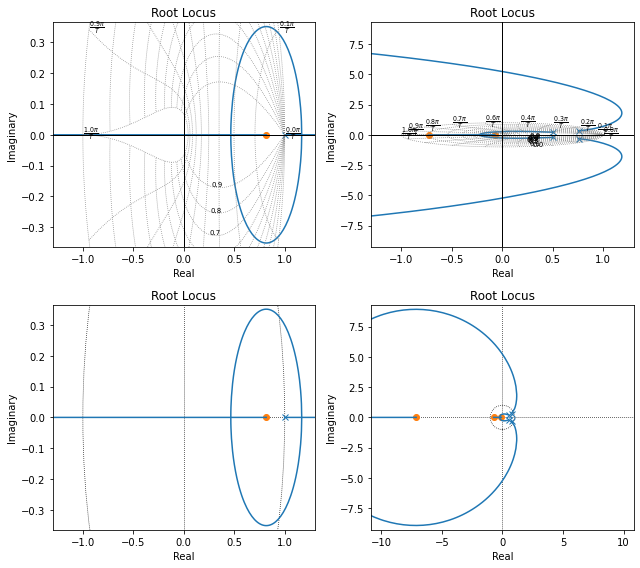

In [71]:
# Subplots - discrete time
fig, axes = plt.subplots(2, 2, figsize=(9,8))
rlocus(Gz1, ax=axes[0, 0], title='Gz1')
rlocus(Gz2, ax=axes[0, 1], title='Gz1')
rlocus(Gz1, ax=axes[1, 0], grid=False, title='Gz1 - no grid')
rlocus(Gz2, ax=axes[1, 1], grid=False, title='Gz1 - no grid')
plt.tight_layout()
plt.savefig('rlocus_subplots1.pdf')
plt.show()

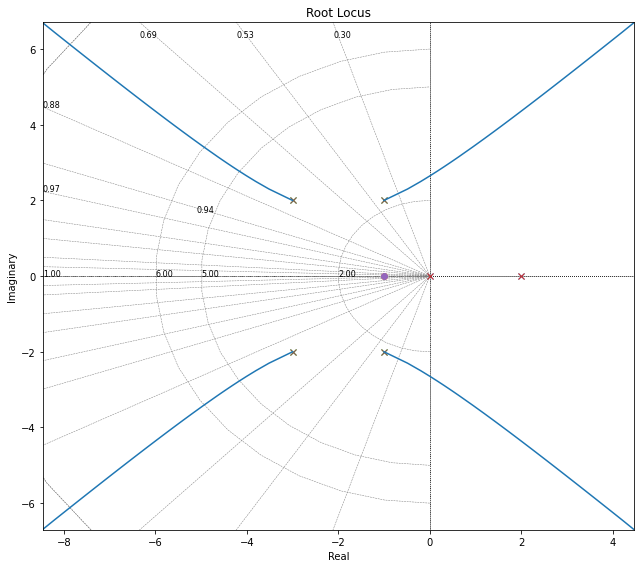

In [72]:
# Subplots - sontinuous time, done differently due to sgrid
fig = plt.figure(figsize=(9,8))
rlocus(G1, position=(2, 2, 1), title='G1')
rlocus(G2, position=(2, 2, 2), title='G2')
rlocus(G1, position=(2, 2, 3), grid=False, title='G1 - no grid')
rlocus(G2, position=(2, 2, 4), grid=False, title='G2 - no grid')
plt.tight_layout()
savefig('rlocus_subplots1')
plt.show()

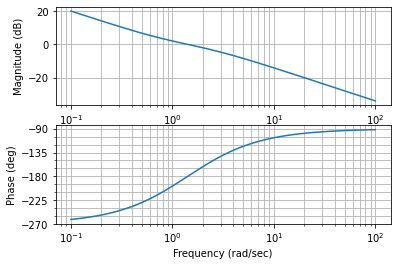

In [73]:
x = bode(G1)
plt.savefig('bode_1.pdf')

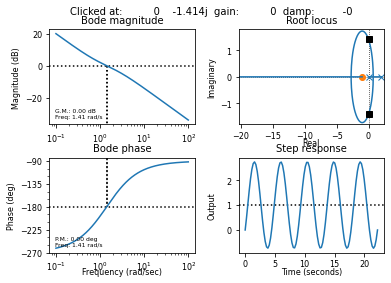

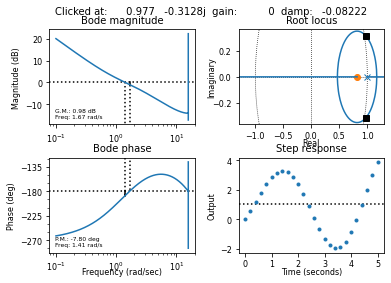

In [74]:
# Check sisotool works (includes rlocus plot)
sisotool(G1)
plt.savefig('sisotool')
plt.show()

sisotool(Gz1)
plt.savefig('sisotool')
plt.show()

## How to make subplots with different projections

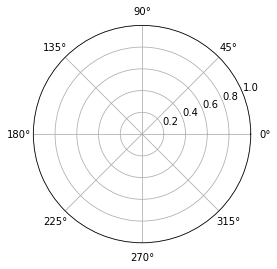

In [75]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))

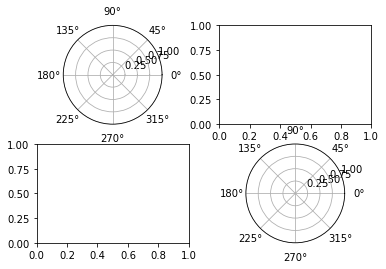

In [76]:
fig = plt.figure()
fig.add_subplot(2, 2, 1, projection='polar')
fig.add_subplot(2, 2, 2)
fig.add_subplot(2, 2, 3)
fig.add_subplot(2, 2, 4, projection='polar')
plt.show()